In [1]:
import elasticsearch
from datetime import datetime

In [2]:
country="chile"
from_="2022-03-01"
to_="2022-03-08"
media_outlets=["elllanquihue","elaustral","laestrelladechiloe","elheraldoaustral","radiosago",
               "elrepuertero","elvacanudo","elhuemul","seminariolocal","elquellonino","elinsular",
               "radiopudeto","radioacogida","elcalbucano","segundos33",
               "prensadelestuario","fresiaahora","soychiloe"]

keyword=""
simple_keyword=False

In [3]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic"
PASS= "dummy_elastic"

In [4]:
#NO MODIFICAR

es = elasticsearch.Elasticsearch(
    IP,
    #port=PORT,
    http_auth=(USER, PASS)
)

In [5]:
#NO MODIFICAR
match=""
if (simple_keyword):
    match="match"
else:
    match="match_phrase"

query = { 
    "bool": { 
      "must": [
    
      ],
    "filter": [
        {"range": {
      "date": {
        "gte": from_,
        "lt": to_
      }}},
        { "term":  { "country": country }},
        { "terms":  { "media_outlet": media_outlets }} 
    ]
    }  
}

In [6]:
res = es.search(index="news", query=query, size=300)
print("Son %d noticias encontradas..." % res['hits']['total']['value'])

Son 187 noticias encontradas...


### Guardar noticias

In [7]:
import pandas as pd

data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[],'search':[]}

df = pd.DataFrame(data)  
  
for hit in res['hits']['hits']:
    id_news = hit['_source']['id_news']
    country = hit['_source']['country']
    media_outlet = hit['_source']['media_outlet']
    url = hit['_source']['url']
    title = hit['_source']['title']
    text = hit['_source']['text']
    date = hit['_source']['date']
    search = keyword
    
    new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date, 'search':search}
    
    df = df.append(new_row, ignore_index=True)

df.to_csv("noticias_semana.csv")

In [8]:
df = pd.read_csv("noticias_semana.csv", index_col=0)

df

,id_news,country,media_outlet,url,title,text,date,search
0,47318436.0,chile,radioacogida,https://radioacogida.cl/4823-titulos-de-domini...,4823 títulos de dominio se han entregado en la...,"El seremi de Bienes Nacionales, Jorge Moreno, ...",2022-03-04,NaN
1,47318442.0,chile,radioacogida,https://radioacogida.cl/seremi-de-educacion-ju...,Seremi de Educación junto a Delegado Presidenc...,Hasta el Colegio San José de Puerto Montt lleg...,2022-03-02,NaN
2,47326657.0,chile,radiosago,https://www.radiosago.cl/abren-encuesta-para-e...,Abren encuesta para elegir proyectos de movili...,En el marco del desarrollo de la segunda etapa...,2022-03-05,NaN
3,47326666.0,chile,radiosago,https://www.radiosago.cl/hombre-fallecio-duran...,Hombre falleció durante la madrugada tras ser ...,Un hombre de 41 años de edad falleció durante ...,2022-03-03,NaN
4,47326667.0,chile,radiosago,https://www.radiosago.cl/detectan-a-hombre-que...,Detectan a hombre que ofrecía clases de conduc...,Carabineros de la Sección de Investigación de ...,2022-03-04,NaN
...,...,...,...,...,...,...,...,...
182,47670585.0,chile,radiopudeto,http://www.pudeto.cl/?p=56852,"Consejeros de Chiloé, siguen preocupados por f...","Consejeros regionales de Chiloé, nuevamente ex...",2022-03-05,NaN
183,47670587.0,chile,radiopudeto,http://www.pudeto.cl/?p=56826,Se entregan kits de ergonomía en servicios clí...,NaN,2022-03-03,NaN
184,47670588.0,chile,radiopudeto,http://www.pudeto.cl/?p=56838,Firman convenio de traspaso de terreno para fu...,Tras un encuentro protocolar entre gran parte ...,2022-03-04,NaN
185,47670728.0,chile,radiopudeto,http://www.pudeto.cl/?p=56820,Padres y apoderados protestan por mal estado E...,Una protesta desarrollaron los padres y apoder...,2022-03-02,NaN


In [9]:
import spacy
nlp = spacy.load("es_core_news_md")
from spacy.matcher import PhraseMatcher


In [10]:
cities = ["Ancud","Castro","Chonchi",
           "Curaco de Vélez", "Dalcahue","Puqueldón",
          "Queilén","Quemchi","Quellón",
           "Quinchao","Calbuco","Cochamó",
          "Fresia","Frutillar","Llanquihue",
           "Los Muermos","Maullín","Puerto Montt",
          "Puerto Varas","Osorno","Puerto Octay",
          "Purranque","Puyehue","Río Negro",
           "San Juan de la Costa","San Pablo","Chaitén",
          "Futaleufú","Hualaihué","Palena"]

In [11]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in cities:
    matcher_cities.add(city, [nlp(city)])

dataset = df
dataset_cities = dataset


In [12]:
import pandas
archivo = "./noticias_semana.csv"
corpus = pandas.read_csv(archivo)

noticias = corpus.text.values.tolist()

In [13]:
from spacy.matcher import Matcher
nlp = spacy.load("es_core_news_sm")
matcher = Matcher(nlp.vocab)

In [14]:
!pip install gensim

import numpy as np
import pandas as pd

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [16]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [17]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
nan
[E866] Expected a string or 'Doc' as input, but got: <class 'float'>.
182
183
nan
[E866] Expected a string or 'Doc' as input, but got: <class 'float'>.
184
185
186


In [18]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

In [19]:
texts = noticias_procesadas
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

In [20]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [21]:
lda_model.save('./lda_model_noticias_semana_5')

In [22]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.006*"años" + 0.005*"comuna" + 0.005*"horas" + 0.005*"lugar" + '
  '0.005*"víctima" + 0.004*"sector" + 0.004*"vehículo" + 0.004*"ruta" + '
  '0.004*"marzo" + 0.003*"vida" + 0.003*"accidente" + 0.003*"sueño" + '
  '0.003*"hombre" + 0.003*"parte" + 0.003*"personal" + 0.003*"detención" + '
  '0.003*"lesiones" + 0.003*"automóvil" + 0.003*"personas" + 0.003*"región" + '
  '0.003*"prisión" + 0.002*"control" + 0.002*"persona" + 0.002*"investigación" '
  '+ 0.002*"días" + 0.002*"sujeto" + 0.002*"tránsito" + 0.002*"hecho" + '
  '0.002*"director" + 0.002*"madrugada" + 0.002*"stock" + 0.002*"partido" + '
  '0.002*"cuerpo" + 0.002*"trabajadores" + 0.002*"kilómetro" + 0.002*"fiscal" '
  '+ 0.002*"beneficios" + 0.002*"material" + 0.002*"prisión preventiva" + '
  '0.002*"altura" + 0.002*"delito" + 0.002*"autopsia" + 0.002*"tarde" + '
  '0.002*"campaña" + 0.002*"través" + 0.002*"proyecto" + 0.002*"acuerdo" + '
  '0.002*"conductor" + 0.002*"control de detención" + 0.002*"recinto" + '
  '0.002*

In [23]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

C:\Users\marce\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.178255 -0.031732       1        1  26.057310
1     -0.083309 -0.137600       2        1  20.913957
3     -0.008195  0.032834       3        1  20.501037
4     -0.060875  0.057309       4        1  18.439519
0     -0.025876  0.079190       5        1  14.088178, topic_info=          Term       Freq      Total Category  logprob  loglift
2353     casos  29.000000  29.000000  Default  30.0000  30.0000
588   proyecto  45.000000  45.000000  Default  29.0000  29.0000
97      clases  29.000000  29.000000  Default  28.0000  28.0000
945    mujeres  39.000000  39.000000  Default  27.0000  27.0000
2102   terreno  19.000000  19.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
733      hecho   5.976842  19.811448   Topic5  -6.0605   0.7615
212       días   6.164085  26.105057   Topic5  -6.0296   0.5164
51      región   6.715980  81.476615   Topic5  -5.9439  -0.5360
46    personas   6.763708  96.207376   Topic5  -5.9368  -0.6951
424   director   5.932113  29.642166   Topic5  -6.0680   0.3510

[351 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
1958      1  0.918332            2020
1990      1  0.734663            2021
1990      3  0.146933            2021
1990      5  0.073466            2021
5254      5  0.876173  Alfredo Castro
...     ...       ...             ...
606       4  0.267842           áreas
919       1  0.775860               “
919       2  0.096983               “
919       4  0.096983               “
5705      1  0.968403               ●

[615 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

In [24]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(dataset))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_procesadas, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.279941321458509

Coherence Score:  0.43160884340723893


In [25]:
### NO CAMBIAR ESTA CELDA###

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [26]:
start=2
limit=15
step=2

In [27]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8
10
12
14


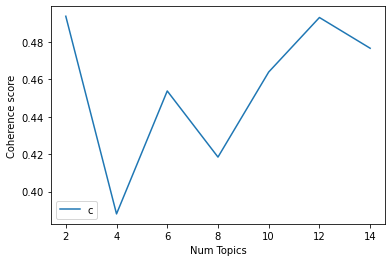

In [28]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [29]:
optimal_model = model_list[5]

In [30]:
archivo='./optimal_model_noticias_semana_12'

In [31]:
optimal_model.save(archivo)

In [32]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

In [33]:
from gensim.models import LdaModel

optimal_model = LdaModel.load(archivo, mmap='r')

In [34]:
def format_topics_documents(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.9917,"centro, años, proyecto, fundación, terreno, re...","El seremi de Bienes Nacionales, Jorge Moreno, ..."
1,1,3.0,0.5260,"datos, país, personas, información, uso, ●, mu...",Hasta el Colegio San José de Puerto Montt lleg...
2,2,5.0,0.9892,"avance, niños, obras, proyecto, estudio, millo...",En el marco del desarrollo de la segunda etapa...
3,3,6.0,0.9879,"hechos, sector, comuna, sujeto, personas, pago...",Un hombre de 41 años de edad falleció durante ...
4,4,6.0,0.9010,"hechos, sector, comuna, sujeto, personas, pago...",Carabineros de la Sección de Investigación de ...
5,5,6.0,0.6183,"hechos, sector, comuna, sujeto, personas, pago...",Luego de que este día martes dejara de operar ...
6,6,5.0,0.9894,"avance, niños, obras, proyecto, estudio, millo...",Hasta el Salón Lámpara del Centro Cultural de ...
7,7,1.0,0.9828,"clases, establecimientos, estudiantes, educaci...",Así lo informó el Departamento de Administraci...
8,8,9.0,0.9595,"región, casos, personas, turismo, provincia, t...",El único recorrido de microbuses urbanos que l...
9,9,9.0,0.9859,"región, casos, personas, turismo, provincia, t...",Dentro de los nombramientos del presidente ele...


In [35]:
media_outlet = corpus.filter(['media_outlet'], axis=1)
df_dominant_topic=df_dominant_topic.join(media_outlet)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,4.0,0.9917,"centro, años, proyecto, fundación, terreno, re...","El seremi de Bienes Nacionales, Jorge Moreno, ...",radioacogida
1,1,3.0,0.5260,"datos, país, personas, información, uso, ●, mu...",Hasta el Colegio San José de Puerto Montt lleg...,radioacogida
2,2,5.0,0.9892,"avance, niños, obras, proyecto, estudio, millo...",En el marco del desarrollo de la segunda etapa...,radiosago
3,3,6.0,0.9879,"hechos, sector, comuna, sujeto, personas, pago...",Un hombre de 41 años de edad falleció durante ...,radiosago
4,4,6.0,0.9010,"hechos, sector, comuna, sujeto, personas, pago...",Carabineros de la Sección de Investigación de ...,radiosago
...,...,...,...,...,...,...
182,182,9.0,0.7887,"región, casos, personas, turismo, provincia, t...","Consejeros regionales de Chiloé, nuevamente ex...",radiopudeto
183,183,8.0,0.1418,"trabajo, parte, lugar, región, proyecto, caso,...",NaN,radiopudeto
184,184,4.0,0.9953,"centro, años, proyecto, fundación, terreno, re...",Tras un encuentro protocolar entre gran parte ...,radiopudeto
185,185,2.0,0.6809,"incendio, año, parte, reconstrucción, cuenta, ...",Una protesta desarrollaron los padres y apoder...,radiopudeto


In [36]:
from pandasql import sqldf 

In [37]:
result = sqldf("SELECT Dominant_Topic, count(*) as nb_noticias FROM df_dominant_topic GROUP BY Dominant_Topic ORDER BY count(*) DESC")
result

,Dominant_Topic,nb_noticias
0,8.0,27
1,2.0,24
2,9.0,21
3,3.0,21
4,6.0,19
5,11.0,15
6,5.0,15
7,0.0,15
8,4.0,11
9,7.0,8


In [38]:
media_outlets

['elllanquihue',
 'elaustral',
 'laestrelladechiloe',
 'elheraldoaustral',
 'radiosago',
 'elrepuertero',
 'elvacanudo',
 'elhuemul',
 'seminariolocal',
 'elquellonino',
 'elinsular',
 'radiopudeto',
 'radioacogida',
 'elcalbucano',
 'segundos33',
 'prensadelestuario',
 'fresiaahora',
 'soychiloe']

In [39]:
dict_topic_cities = {cities[i]:[0]*12 for i in range (len(cities))}

# {osorno: [0,0,0,0,2,0,1,0,0,0,0,0]}

In [40]:
dict_topic_cities

{'Ancud': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Castro': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Chonchi': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Curaco de Vélez': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Dalcahue': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Puqueldón': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Queilén': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Quemchi': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Quellón': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Quinchao': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Calbuco': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Cochamó': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Fresia': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Frutillar': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Llanquihue': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Los Muermos': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Maullín': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Puerto Montt': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Puerto Varas': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'Osorno': [0, 0, 0, 0,

In [41]:
df_cities_topic = pd.DataFrame(0, index=cities, columns=[f"Topic {i}" for i in range(12)])

In [42]:
for (i,new),(j, row) in zip(df_dominant_topic.iterrows(),  dataset_cities.iterrows()):
    txt = row["text"]
    try:
    
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset_cities.at[index,span.text.replace(" ","_")]=1
            
            df_cities_topic[f"Topic {int(new[1])}"][str(span)] += 1
            
    except Exception as e:
        pass

In [43]:
df_cities_topic

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
Ancud,2,0,3,0,2,1,3,2,4,5,0,0
Castro,0,0,18,3,1,0,0,0,4,5,0,3
Chonchi,0,0,0,0,0,4,0,0,0,0,0,0
Curaco de Vélez,0,0,0,0,0,0,0,0,0,4,0,0
Dalcahue,0,0,0,0,0,3,0,0,0,1,0,0
Puqueldón,0,0,0,0,0,2,0,0,0,0,0,0
Queilén,0,0,0,0,0,0,0,0,0,0,0,0
Quemchi,0,0,0,0,0,0,0,0,0,0,0,0
Quellón,1,0,3,0,0,0,0,0,1,2,0,0
Quinchao,0,0,3,0,0,0,0,0,0,5,0,0


In [44]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

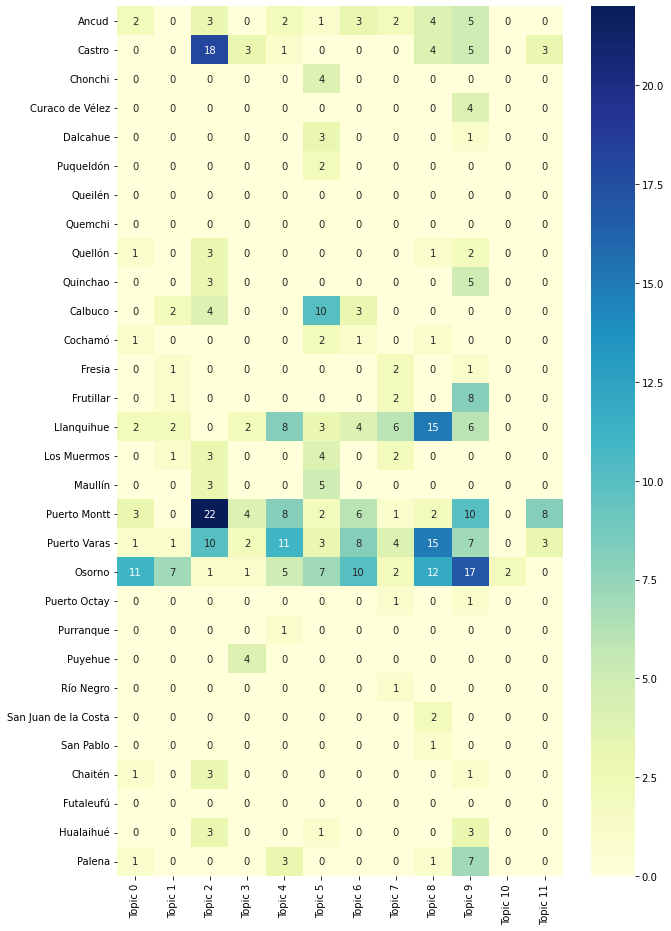

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 16))

sns.heatmap(df_cities_topic, annot=True, cmap="YlGnBu")